# Dimensionality Reduction - PCA (Principal Component Analysis)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load cleaned dataset
df = pd.read_csv('../data/heart_disease.csv')
print(f"Loaded data with shape: {df.shape}")
df.head()

Loaded data with shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
# Drop target column to isolate features
X = df.drop('target', axis=1)
y = df['target']  # save for later use

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features standardized.")

Features standardized.


In [5]:
# Fit PCA without specifying n_components to analyze full variance
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("PCA applied.")

PCA applied.


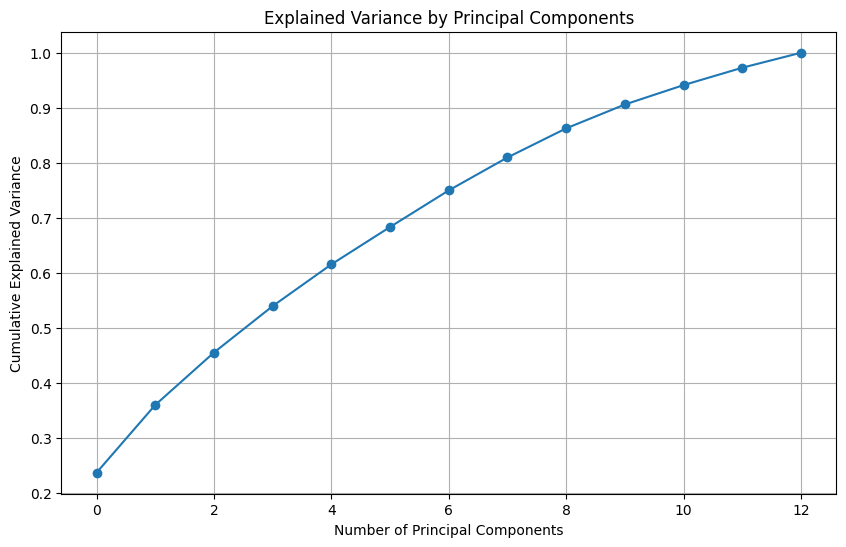

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()


In [7]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Get the number of components needed to retain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"{n_components_95} components explain at least 95% of the variance.")

12 components explain at least 95% of the variance.


In [8]:
# Now fit PCA with the optimal number of components
pca_opt = PCA(n_components=n_components_95)
X_reduced = pca_opt.fit_transform(X_scaled)

print(f"Reduced shape: {X_reduced.shape}")

Reduced shape: (303, 12)


In [9]:
df_pca = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(X_reduced.shape[1])])
df_pca['target'] = y
df_pca.to_csv('../data/heart_disease_pca.csv', index=False)